### Select the Right Threshold values using ROC Curve for Sample Binary Classification & on Titanic Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification

In [3]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=10000,n_features=25,n_classes=2, weights=[1,0.5], random_state=1)

In [4]:
X.shape

(10000, 25)

In [5]:
y

array([0, 1, 1, ..., 0, 0, 0])

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Random Forests

In [8]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9900349494569468


In [9]:
ytrain_pred

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [0.01, 0.99],
       [0.99, 0.01]])

#### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9916525579781117
Logistic test roc-auc: 0.9892890970235207


#### Adaboost Classifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9974823701005016
Adaboost test roc-auc: 0.9882854139646018


#### KNNClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9712400672669173
Adaboost test roc-auc: 0.9045473896814946


#### Now we will focus on selecting the best threshold for maximum accuracy

In [17]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis='columns')
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9891513123372573


In [18]:
pd.concat(pred,axis=1).head()

,0,1,2
0,0.00,1.869592e-05,0.466440
1,0.00,3.571383e-04,0.472952
2,0.00,1.889621e-12,0.455869
3,0.90,9.135032e-01,0.516531
4,0.03,1.854437e-04,0.461233


In [19]:
final_prediction.head()

0    0.155486
1    0.157770
2    0.151956
3    0.776678
4    0.163806
dtype: float64

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.85656912, 0.85656912, 0.84670073, 0.84616613, 0.8338736 ,
       0.83380206, 0.82547247, 0.82542028, 0.82117513, 0.82075688,
       0.8029728 , 0.80283208, 0.79655647, 0.79616771, 0.79449147,
       0.7944023 , 0.77743294, 0.77667789, 0.77093575, 0.77032044,
       0.75582958, 0.75578368, 0.72720172, 0.72664075, 0.69166865,
       0.68841827, 0.66581418, 0.66413126, 0.64326421, 0.64041484,
       0.56829422, 0.55932357, 0.54815801, 0.54143783, 0.53654441,
       0.48630742, 0.48516855, 0.47807608, 0.46875749, 0.44738636,
       0.44618012, 0.17348519, 0.1734306 , 0.16957146, 0.16941536,
       0.15972311, 0.1597151 , 0.15851392, 0.15850617, 0.1573268 ,
       0.15732133, 0.15513971, 0.15513921, 0.15394439, 0.15393908,
       0.15191439, 0.15189282, 0.15085683, 0.15084862, 0.14754201,
       0.14725731, 0.14269699])

In [21]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
31,0.559324,0.9880
34,0.536544,0.9880
30,0.568294,0.9880
33,0.541438,0.9880
32,0.548158,0.9876


The best threshold we can select is 0.5593

In [22]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

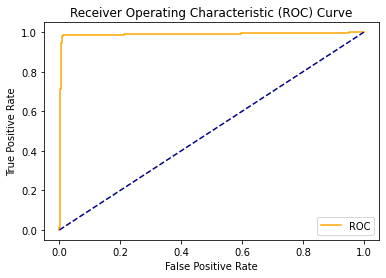

In [23]:
plot_roc_curve(fpr,tpr)

Now lets check the titanic dataset and find the right threshold by using the ROC AUC curve

### Implementation on Titanic Dataset

In [24]:
df=pd.read_csv('../../Titanic-survival-prediction/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df['Age'].fillna(value=df['Age'].median(),inplace=True)
df['Cabin'].fillna(value='Missing',inplace=True)
an_list=[]
for val in df['Cabin']:
    if val is np.nan:
        an_list.append(val)
    else:
        an_list.append(val[0])
print(len(an_list))
df['Cabin']=an_list
df.loc[df['SibSp']==5,'SibSp']=0
df.loc[df['SibSp']==8,'SibSp']=0
df.loc[df['Parch']==3,'Parch']=0
df.loc[df['Parch']==4,'Parch']=0
df.loc[df['Parch']==5,'Parch']=0
df.loc[df['Parch']==6,'Parch']=0
list1=[]
for val in df['Ticket']:
    inn=val.isnumeric()
    if(inn):
        list1.append(1)
    else:
        list1.append(0)    
print(len(list1))
df['Ticket_new']=list1
new_df=df.drop(labels=['PassengerId','Name','Ticket'],axis=1)
new_df.head()

891
891


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_new
0,0,3,male,22.0,1,0,7.2500,M,S,0
1,1,1,female,38.0,1,0,71.2833,C,C,0
2,1,3,female,26.0,0,0,7.9250,M,S,0
3,1,1,female,35.0,1,0,53.1000,C,S,1
4,0,3,male,35.0,0,0,8.0500,M,S,1


In [26]:
df['Embarked'].fillna(value='S',inplace=True)
new_df['Embarked'].fillna(value='S',inplace=True)
IQR= new_df['Age'].quantile(0.75)-new_df['Age'].quantile(0.25)
print('IQR:',IQR)
low_bound=new_df['Age'].quantile(0.25)-(IQR*2)
up_bound=new_df['Age'].quantile(0.75)+(IQR*2)
print('lower bound is {} and upper bound is {}:'.format(low_bound,up_bound))
new_df.loc[new_df['Age']>61,'Age']=61
IQR= new_df['Fare'].quantile(0.75)-new_df['Fare'].quantile(0.25)
print('IQR:',IQR)
low_bound=new_df['Fare'].quantile(0.25)-(IQR*3)
up_bound=new_df['Fare'].quantile(0.75)+(IQR*3)
print('lower bound is {} and upper bound is {}:'.format(low_bound,up_bound))
new_df.loc[new_df['Fare']>100,'Fare']=100
dict1=dict(new_df.groupby('Cabin')['Survived'].mean())
new_df['Cabin_target_mean']=new_df['Cabin'].map(dict1)
dict1=dict(new_df.groupby('Embarked')['Survived'].mean())
new_df['Embarked_target_mean']=new_df['Embarked'].map(dict1)
dict1=dict(new_df.groupby('Parch')['Survived'].mean())
new_df['Parch_target_mean']=new_df['Parch'].map(dict1)
dict1=dict(new_df.groupby('SibSp')['Survived'].mean())
new_df['SibSp_target_mean']=new_df['SibSp'].map(dict1)
dict1=dict(new_df.groupby('Sex')['Survived'].mean())
new_df['Sex_target_mean']=new_df['Sex'].map(dict1)
dict1=dict(new_df.groupby('Pclass')['Survived'].mean())
new_df['Pclass_target_mean']=new_df['Pclass'].map(dict1)
dict1=dict(new_df.groupby('Ticket_new')['Survived'].mean())
new_df['Ticket_new_target_mean']=new_df['Ticket_new'].map(dict1)
new_df.head()

IQR: 13.0
lower bound is -4.0 and upper bound is 61.0:
IQR: 23.0896
lower bound is -61.358399999999996 and upper bound is 100.2688:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean
0,0,3,male,22.0,1,0,7.2500,M,S,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609
1,1,1,female,38.0,1,0,71.2833,C,C,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609
2,1,3,female,26.0,0,0,7.9250,M,S,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609
3,1,1,female,35.0,1,0,53.1000,C,S,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266
4,0,3,male,35.0,0,0,8.0500,M,S,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266


In [28]:
from sklearn.preprocessing import MinMaxScaler
rs=MinMaxScaler()
rs.fit(np.array(new_df['Fare']).reshape(-1,1))
new_df['Fare_rs']=rs.transform(np.array(new_df['Fare']).reshape(-1,1))

rs=MinMaxScaler()
rs.fit(np.array(new_df['Age']).reshape(-1,1))
new_df['Age_rs']=rs.transform(np.array(new_df['Age']).reshape(-1,1))

new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,Age_rs
0,0,3,male,22.0,1,0,7.2500,M,S,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609,0.072500,0.356223
1,1,1,female,38.0,1,0,71.2833,C,C,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,0.620337
2,1,3,female,26.0,0,0,7.9250,M,S,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609,0.079250,0.422252
3,1,1,female,35.0,1,0,53.1000,C,S,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,0.570815
4,0,3,male,35.0,0,0,8.0500,M,S,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266,0.080500,0.570815


In [29]:
rs=MinMaxScaler()
rs.fit(np.array(new_df['Pclass']).reshape(-1,1))
new_df['Pclass_rs']=rs.transform(np.array(new_df['Pclass']).reshape(-1,1))

rs=MinMaxScaler()
rs.fit(np.array(new_df['SibSp']).reshape(-1,1))
new_df['SibSp_rs']=rs.transform(np.array(new_df['SibSp']).reshape(-1,1))

rs=MinMaxScaler()
rs.fit(np.array(new_df['Parch']).reshape(-1,1))
new_df['Parch_rs']=rs.transform(np.array(new_df['Parch']).reshape(-1,1))

new_df=new_df.drop(labels=['Age','Fare','Parch','SibSp','Pclass'],axis=1)

new_df.head()

,Survived,Sex,Cabin,Embarked,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,Age_rs,Pclass_rs,SibSp_rs,Parch_rs
0,0,male,M,S,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609,0.072500,0.356223,1.0,0.25,0.0
1,1,female,C,C,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,0.620337,0.0,0.25,0.0
2,1,female,M,S,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609,0.079250,0.422252,1.0,0.00,0.0
3,1,female,C,S,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,0.570815,0.0,0.25,0.0
4,0,male,M,S,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266,0.080500,0.570815,1.0,0.00,0.0


In [30]:
new_df=pd.get_dummies(new_df,drop_first=True)
new_df.head()

,Survived,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S
0,0,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609,0.072500,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609,0.079250,...,0,0,0,0,0,0,1,0,0,1
3,1,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,...,0,1,0,0,0,0,0,0,0,1
4,0,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266,0.080500,...,0,0,0,0,0,0,1,0,0,1


In [31]:
x=new_df.drop(labels=['Survived'],axis=1)
y=new_df['Survived']

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)
print(extra.feature_importances_)
imp_df=pd.Series(extra.feature_importances_)
col_df=pd.Series(x.columns)
ov_df=pd.concat([imp_df,col_df],axis=1)
ov_df.columns=['Scores','Columns']
final_cols=ov_df[ov_df['Scores']>0.01]['Columns']
print(len(final_cols))

[0.01254728 0.02618006 0.01372318 0.02081231 0.02375279 0.1558244
 0.04482859 0.01199056 0.18942689 0.21620824 0.04045213 0.02336088
 0.01861119 0.12439113 0.00551763 0.0051585  0.00450124 0.00809058
 0.00245507 0.00130701 0.03286042 0.00029961 0.00552965 0.01217066]
16


In [33]:
x[final_cols].corr()

,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,Age_rs,Pclass_rs,SibSp_rs,Parch_rs,Sex_male,Cabin_M,Embarked_S
Ticket_new,1.000000,-0.015627,-0.087372,-0.007618,-0.050404,0.032507,-0.083525,1.000000,-0.150155,-0.027728,0.079763,0.080228,-0.062242,-0.032507,0.008180,-0.007143
Cabin_target_mean,-0.015627,1.000000,0.184435,0.117256,0.142476,0.160683,0.669053,-0.015627,0.605239,0.238203,-0.697997,0.001946,0.091724,-0.160683,-0.949947,-0.099273
Embarked_target_mean,-0.087372,0.184435,1.000000,0.037387,0.103071,0.096453,0.190343,-0.087372,0.261170,0.024964,-0.208104,-0.027371,0.008331,-0.096453,-0.188619,-0.876841
Parch_target_mean,-0.007618,0.117256,0.037387,1.000000,0.112499,0.211701,0.054927,-0.007618,0.269790,-0.276532,-0.051223,0.417484,0.864607,-0.211701,-0.109416,0.011544
SibSp_target_mean,-0.050404,0.142476,0.103071,0.112499,1.000000,0.163694,0.192365,-0.050404,0.254039,0.083452,-0.186795,0.215694,0.030604,-0.163694,-0.143111,-0.055252
Sex_target_mean,0.032507,0.160683,0.096453,0.211701,0.163694,1.000000,0.134981,0.032507,0.240352,-0.077131,-0.131900,0.154382,0.224612,-1.000000,-0.140391,-0.119224
Pclass_target_mean,-0.083525,0.669053,0.190343,0.054927,0.192365,0.134981,1.000000,-0.083525,0.677714,0.336163,-0.996067,-0.021425,0.039911,-0.134981,-0.694800,-0.055364
Ticket_new_target_mean,1.000000,-0.015627,-0.087372,-0.007618,-0.050404,0.032507,-0.083525,1.000000,-0.150155,-0.027728,0.079763,0.080228,-0.062242,-0.032507,0.008180,-0.007143
Fare_rs,-0.150155,0.605239,0.261170,0.269790,0.254039,0.240352,0.677714,-0.150155,1.000000,0.140125,-0.703170,0.221039,0.304302,-0.240352,-0.617893,-0.151768
Age_rs,-0.027728,0.238203,0.024964,-0.276532,0.083452,-0.077131,0.336163,-0.027728,0.140125,1.000000,-0.341693,-0.261370,-0.313075,0.077131,-0.241184,-0.005504


Pclass_rs,Cabin_M can be removed beacause they are highly correlated with other features

In [42]:
final_cols.to_numpy()
final_cols=['Ticket_new', 'Cabin_target_mean', 'Embarked_target_mean',
       'Parch_target_mean', 'SibSp_target_mean', 'Sex_target_mean',
       'Pclass_target_mean', 'Ticket_new_target_mean', 'Fare_rs',
       'Age_rs', 'SibSp_rs', 'Parch_rs', 'Sex_male', 'Embarked_S']

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x[final_cols],y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 14)
(179, 14)
(712,)
(179,)


In [44]:
x_train.to_csv('x_train_titanic.csv',index=False)
y_train.to_csv('y_train_titanic.csv',index=False)
x_test.to_csv('x_test_titanic.csv',index=False)
y_test.to_csv('y_test_titanic.csv',index=False)

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
train_auc=roc_auc_score(y_train,rf_model.predict_proba(x_train)[:,1])
test_auc=roc_auc_score(y_test,rf_model.predict_proba(x_test)[:,1])
#y_train_proba=rf_model.predict_proba(x_train)
#y_test_proba=rf_model.predict_proba(x_test)

In [49]:
print(train_auc)
print(test_auc)

0.9974914279951593
0.888095238095238


In [50]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
train_auc=roc_auc_score(y_train,log_model.predict_proba(x_train)[:,1])
test_auc=roc_auc_score(y_test,log_model.predict_proba(x_test)[:,1])
print(train_auc)
print(test_auc)

0.8536414212720185
0.8791505791505791


In [56]:
predictions=[]
for model in [rf_model,log_model]:
    predictions.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_pred=pd.concat(predictions,axis=1).mean(axis='columns')
print(roc_auc_score(y_test,final_pred))

0.9021879021879021


In [57]:
pd.concat(predictions,axis=1)

,0,1
0,0.383333,0.166848
1,0.071667,0.177488
2,0.063333,0.131481
3,0.970000,0.812271
4,0.310000,0.752286
...,...,...
174,0.236381,0.138555
175,0.011667,0.158267
176,0.150000,0.552311
177,0.880000,0.771402


In [59]:
final_pred

0      0.275091
1      0.124577
2      0.097407
3      0.891135
4      0.531143
         ...   
174    0.187468
175    0.084967
176    0.351156
177    0.825701
178    0.724569
Length: 179, dtype: float64

In [60]:
fpr,tpr,thresholds=roc_curve(y_test,final_pred)

In [63]:
acc_list=[]
for val in thresholds:
    y_pred=np.where(final_pred>val,1,0)
    acc_list.append(accuracy_score(y_test,y_pred,normalize=True))
print(len(acc_list))

56


In [64]:
print(acc_list[0])

0.5865921787709497


In [69]:
acc_df=pd.concat([pd.Series(thresholds),pd.Series(acc_list)],axis=1)
acc_df.head()

,0,1
0,1.977548,0.586592
1,0.977548,0.586592
2,0.870755,0.737430
3,0.862929,0.743017
4,0.849804,0.748603


In [70]:
acc_df.columns=['Threshold','Prob']
acc_df.head()

,Threshold,Prob
0,1.977548,0.586592
1,0.977548,0.586592
2,0.870755,0.737430
3,0.862929,0.743017
4,0.849804,0.748603


In [71]:
acc_df.sort_values(by='Prob',ascending=False,inplace=True)
acc_df.head()

,Threshold,Prob
19,0.530181,0.815642
16,0.612206,0.815642
15,0.664053,0.815642
14,0.671507,0.810056
13,0.691119,0.810056


So the better threshold is 0.5301/0.6122/0.6640

In [72]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

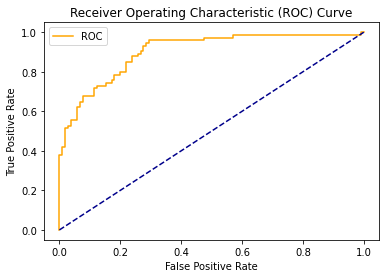

In [73]:
plot_roc_curve(fpr,tpr)

In [77]:
chk=rf_model.predict_proba(x_test)[:,1]
final_chk=[]
for val in chk:
    if val>0.5301:
        final_chk.append(1)
    else:
        final_chk.append(0)


In [78]:
print(len(final_chk))

179


In [79]:
print(accuracy_score(y_test,final_chk))

0.7932960893854749
